In [3]:
import pandas as pd
df = pd.read_csv('../datasets/20_newsgroup.csv')
df.head(3)

,Unnamed: 0,text,target,title,date
0,0,I was wondering if anyone out there could enli...,7,rec.autos,2023-10-16 18:36:47.015792
1,17,I recently posted an article asking what kind ...,7,rec.autos,2023-10-16 18:36:47.015792
2,29,\nIt depends on your priorities. A lot of peo...,7,rec.autos,2023-10-16 18:36:47.015792


In [6]:
columns_to_drop = ['Unnamed: 0', 'title', 'date']
df = df.drop(columns_to_drop, axis=1)

KeyError: "['Unnamed: 0', 'title', 'date'] not found in axis"

In [7]:
df.head(3)

,text,target
0,I was wondering if anyone out there could enli...,7
1,I recently posted an article asking what kind ...,7
2,\nIt depends on your priorities. A lot of peo...,7


In [8]:
"""
Now we do Data Preprocessing.
"""
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

regexp = RegexpTokenizer("[\w']+")

def convert_to_lowercase(text):
    return text.lower()
def remove_whitespace(text):
    return text.strip()
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") 
    return text.translate(str.maketrans("", "", punct_str))
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)
def remove_http(text):
    http = "https?://\S+|www\.\S+" 
    pattern = r"({})".format(http) 
    return re.sub(pattern, "", text)
# Stopwords
stops = stopwords.words("english") 
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] 
allstops = stops + addstops
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

In [9]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) 
    text = re.sub('\[.*?\]', '', text) 
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_stopwords(text)
    text = discard_non_alpha(text)
    return text

In [11]:
df.dropna(inplace=True)

In [12]:
df['text'] = df['text'].apply(text_normalizer)

In [13]:
df['text'][0]

'wondering anyone could enlighten car sawthe day sports car looked late called bricklin doors really small additionthe front bumper separate rest body know anyone tellme model name engine specs yearsof production car made history whatever info youhave funky looking car please email'

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), max_features=15000, smooth_idf=True, sublinear_tf=True)
df_feature = vectorizer.fit_transform(df['text'])
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_feature, df['target'], test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

#bei max_depth = 9, schon 99% accuracy
dt_model = DecisionTreeClassifier()
dt_model.fit(df_features_train, df_target_train)
target_prediction = dt_model.predict(df_features_test)

In [17]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(df_target_test, target_prediction))

              precision    recall  f1-score   support

           0       0.46      0.38      0.41        88
           1       0.38      0.41      0.40       117
           2       0.43      0.37      0.40       134
           3       0.33      0.39      0.35       122
           4       0.49      0.47      0.48       103
           5       0.50      0.54      0.52       112
           6       0.39      0.42      0.41       107
           7       0.45      0.44      0.45       126
           8       0.51      0.50      0.50       123
           9       0.33      0.49      0.39       129
          10       0.56      0.59      0.58       103
          11       0.67      0.57      0.62       126
          12       0.27      0.29      0.28       117
          13       0.55      0.50      0.52       129
          14       0.46      0.43      0.45       113
          15       0.45      0.43      0.44       108
          16       0.42      0.39      0.40        93
          17       0.73    

In [18]:
accuracy_score = accuracy_score(df_target_test, target_prediction)

In [19]:
accuracy_score

0.4418918918918919

array([[33,  2,  0,  2,  2,  0,  1,  2,  4,  4,  3,  4,  2,  2,  2,  9,
         2,  2,  6,  6],
       [ 2, 48,  9,  8,  8, 11,  4,  1,  2,  5,  1,  1,  6,  5,  4,  1,
         1,  0,  0,  0],
       [ 1, 16, 49, 16,  2, 15,  4,  1,  1, 11,  0,  1,  7,  2,  3,  1,
         0,  1,  2,  1],
       [ 0,  7,  9, 47,  9,  4,  7,  7,  3,  5,  0,  2,  7,  4,  4,  0,
         5,  0,  2,  0],
       [ 0,  5,  6, 15, 48,  3,  6,  3,  1,  4,  0,  0,  3,  2,  5,  0,
         0,  1,  1,  0],
       [ 2,  4, 14,  5,  0, 61,  1,  3,  1,  4,  2,  2,  3,  2,  2,  1,
         3,  1,  1,  0],
       [ 0,  5,  4, 11,  3,  2, 45,  4,  4,  5,  3,  1, 10,  2,  1,  1,
         1,  1,  2,  2],
       [ 2,  5,  0,  5,  3,  2,  7, 56,  8, 12,  3,  2,  4,  2,  0,  1,
         6,  2,  4,  2],
       [ 2,  3,  2,  2,  2,  1,  4, 10, 61, 10,  2,  2,  7,  2,  0,  3,
         2,  2,  4,  2],
       [ 0,  1,  3,  5,  2,  3,  6,  2,  3, 63, 20,  3,  2,  4,  3,  4,
         2,  0,  1,  2],
       [ 0,  1,  0,  2,  1,  1

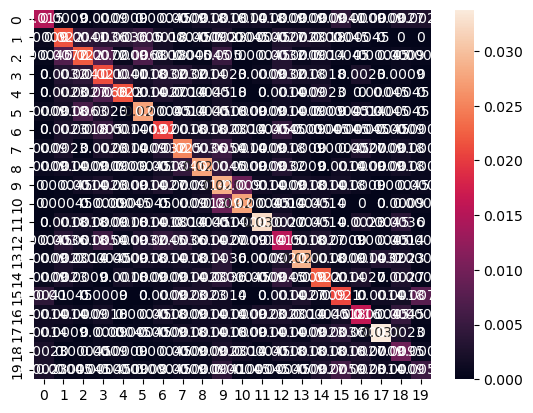